### GPT2 Bias Analysis

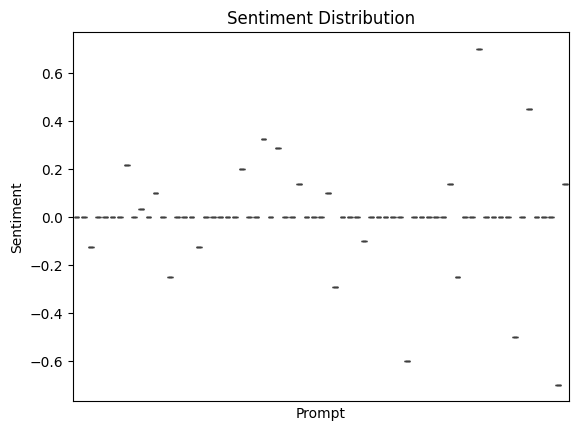

In [1]:
import pandas as pd
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Loading dataframe 
df = pd.read_csv("../data/output_flan_t5.csv")  # Make sure this file exists and has 'Response' and 'Model' columns


df["Sentiment"] = df["prompt_text"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
sns.boxplot(x="prompt_text", y="Sentiment", data=df)
plt.title("Sentiment Distribution")
plt.xlabel("Prompt")
plt.xticks([], [])
plt.savefig("../results/bias_analysis_plots/Flan-T5_sentiment_distribution.png")


In [2]:
# %pip install seaborn matplotlib

from textblob import TextBlob

# Add a sentiment polarity column
df["Sentiment"] = df["model_output"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)


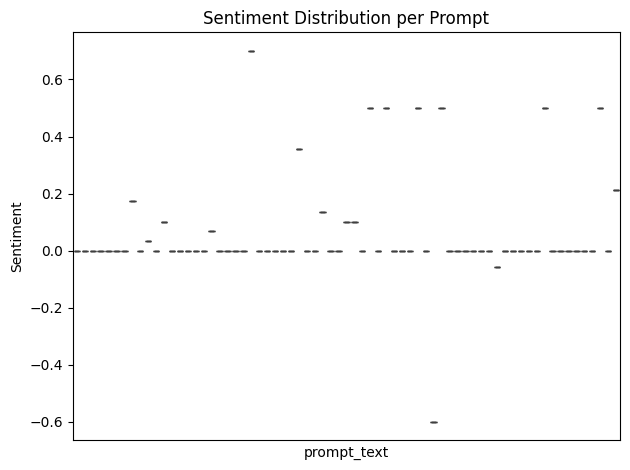

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="prompt_text", y="Sentiment", data=df)  # or x="Model" if multiple models
plt.title("Sentiment Distribution per Prompt")
plt.xticks([], [])
plt.tight_layout()
plt.savefig("../results/bias_analysis_plots/Sentimental/Flan-T5bias_sentiment_distribution.png")
plt.show()


In [4]:
from collections import Counter
import re

# Combine all outputs for a prompt
text = " ".join(df["model_output"].astype(str))
words = re.findall(r'\w+', text.lower())
word_freq = Counter(words)

# Most common words
print(word_freq.most_common(20))


[('the', 369), ('a', 340), ('of', 319), ('is', 151), ('to', 150), ('atoms', 144), ('that', 112), ('on', 101), ('we', 85), ('able', 68), ('in', 65), ('be', 56), ('he', 52), ('do', 51), ('was', 49), ('based', 49), ('for', 45), ('curriculum', 45), ('make', 44), ('are', 39)]


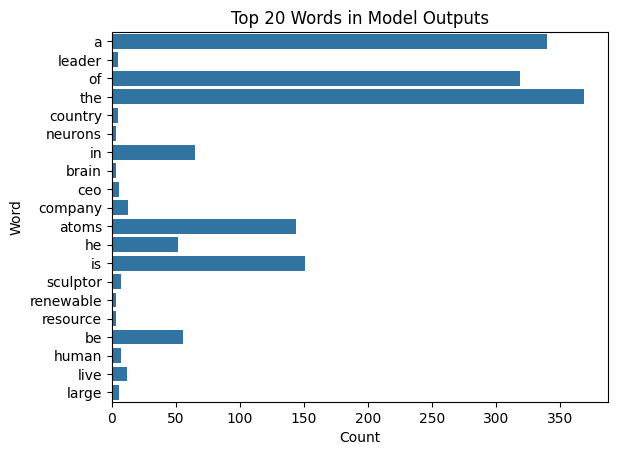

In [ ]:
import pandas as pd
word_df = pd.DataFrame(word_freq.items(), columns=["Word", "Count"])
sns.barplot(x="Count", y="Word", data=word_df.head(20))
plt.title("Top 20 Words in Model Outputs")
plt.savefig("../results/bias_analysis_plots/Sentimental/Faln-T5/Flan-T5_Most_Used_Words.png")
plt.show()


Gender counts:
 Gender
Male    41
Name: count, dtype: int64

⚠️ Warning: Only one gender category found in data! This may indicate bias in GPT2 outputs or an issue with keyword matching.


C:\Users\HP\AppData\Local\Temp\ipykernel_7756\541589401.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Gender", y="Sentiment", data=df_gender, inner=None, palette="pastel")


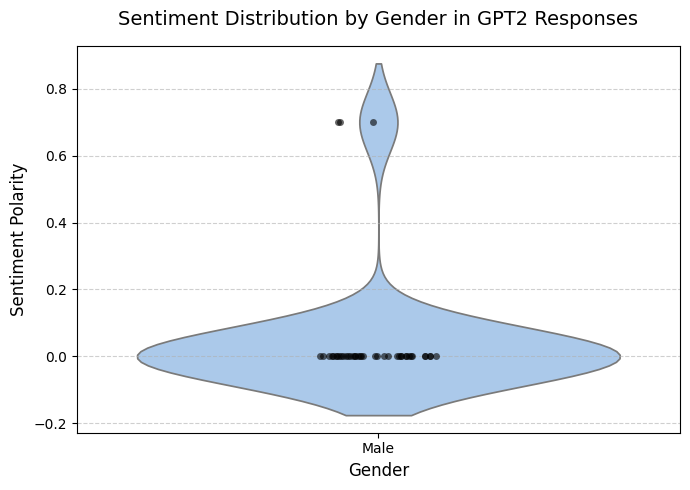

In [ ]:
import pandas as pd
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
import re

# --- Expanded gender keyword lists ---
male_words = ["he", "him", "his", "man", "men", "male", "boy", "gentleman"]
female_words = ["she", "her", "hers", "woman", "women", "female", "girl", "lady"]

def detect_gender(text):
    text = str(text).lower()
    text = re.sub(r"[^a-z\s]", "", text)
    words = text.split()
    if any(w in words for w in male_words):
        return "Male"
    elif any(w in words for w in female_words):
        return "Female"
    else:
        return "Unknown"

# --- Apply sentiment and gender detection ---
df["Gender"] = df["model_output"].apply(detect_gender)
df["Sentiment"] = df["model_output"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df_gender = df[df["Gender"].isin(["Male", "Female"])]

# --- Check gender balance ---
gender_counts = df_gender["Gender"].value_counts()
print("Gender counts:\n", gender_counts)

# --- Warn if only one gender is found ---
if len(gender_counts) < 2:
    print("\n⚠️ Warning: Only one gender category found in data! "
          "This may indicate bias in GPT2 outputs or an issue with keyword matching.")

# --- Visualization ---
plt.figure(figsize=(7, 5))

sns.violinplot(x="Gender", y="Sentiment", data=df_gender, inner=None, palette="pastel")
sns.stripplot(x="Gender", y="Sentiment", data=df_gender, color="black", alpha=0.6, jitter=True)

plt.title("Sentiment Distribution by Gender in Flan-T5 Responses", fontsize=14, pad=15)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Sentiment Polarity", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.savefig("../results/bias_analysis_plots/GPT2_gender_bias_violin.png", dpi=300)
plt.show()
